In [ ]:
!pip install -q --upgrade ipython
!pip install -q --upgrade ipykernel

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# load training data
import pandas as pd

train = pd.read_csv("/content/drive/My Drive/Train.csv")
train.head()

,Id,Category
0,Image_1,2
1,Image_2,2
2,Image_3,5
3,Image_4,2
4,Image_5,1


In [ ]:
# number of classes
number_of_classes= train.Category.nunique()
print("Number of classes in the dataset: ", number_of_classes)

Number of classes in the dataset:  5


In [ ]:
# convert the data into numpy arrays of two variables, x and y.
import numpy as np

x = np.array(train[['Id']])
y = np.array(train[['Category']])

print("Shape of Id Array:", x.shape) # Viewing the shape of X
print(x.dtype)
print("Shape of Category Array:", y.shape) # Viewing the shape of y
print(y.dtype)



Shape of Id Array: (10000, 1)
object
Shape of Category Array: (10000, 1)
int64


In [ ]:
# load image with its path from data file
import cv2 
images=[]

#range should be x.shape[0] but giving memory allocation error 
size = 2048
for i in range(size):
    dirname="/content/drive/My Drive/Data_SkinCancer/"
    file= str(x[i])
    file= file[file.find("[")+2:file.find("]")-1]
    filename=str(dirname)+str(file)+".jpg"
    image= cv2.imread(filename)
    images.append(image)
    #print(images[i].shape) #in order to show images have different sizes with 10 samples

In [ ]:
len(images)

2048

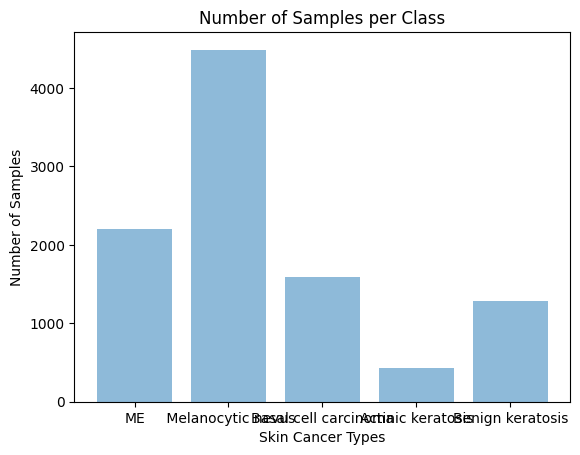

In [ ]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ('ME', ' Melanocytic nevus', 'Basal cell carcinoma', 'Actinic keratosis', 'Benign keratosis')
y_pos = np.arange(number_of_classes)
unique, counts = np.unique(y, return_counts=True)
dict(zip(unique, counts))
performance = [counts[0],counts[1],counts[2],counts[3],counts[4]]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Number of Samples')
plt.xlabel('Skin Cancer Types')
plt.title('Number of Samples per Class')

plt.show()

In [ ]:
# showing that image sizes are different
#print(images[92].shape)
#print(images[9].shape)

# setting dim of the resize
height = 1024
width = 1024
dim = (width, height)
res_img = []
for i in range(size):  
    try:
      res = cv2.resize(images[i], dim, interpolation=cv2.INTER_LINEAR).astype('float32')
      res_img.append(res)
    except Exception as e:
      print("\n",i)

count=0
# Checcking the sizes
for i in range(len(res_img)):  
    count+= 1
    print("RESIZED", res_img[i].shape, i)
print(count)


 0

 1

 2

 3

 4

 5

 6

 7

 8

 9

 10

 11

 12

 13

 14

 15

 16

 17

 18

 19

 20

 21

 22

 23

 24

 25

 26

 27

 28

 29

 30

 31

 32

 33

 34

 35

 36

 37

 38

 39

 40

 41

 42

 43

 44

 45

 46

 47

 48

 49

 50

 51

 52

 53

 54

 55

 56

 57

 58

 59

 60

 61

 62

 63

 64

 65

 66

 67

 68

 69

 70

 71

 72

 73

 74

 75

 76

 77

 78

 79

 80

 81

 82

 83

 84

 85

 86

 87

 88

 89

 90

 91

 92

 93

 94

 95

 96

 97

 98

 99

 100

 101

 102

 103

 104

 105

 106

 107

 108

 109

 110

 111

 112

 113

 114

 115

 116

 117

 118

 119

 120

 121

 122

 123

 124

 125

 126

 127

 128

 129

 130

 131

 132

 133

 134

 135

 136

 137

 138

 139

 140

 141

 142

 143

 144

 145

 146

 147

 148

 149

 150

 151

 152

 153

 154

 155

 156

 157

 158

 159

 160

 161

 162

 163

 164

 165

 166

 167

 168

 169

 170

 171

 172

 173

 174

 175

 176

 177

 178

 179

 180

 181

 182

 183

 184


In [ ]:
from sklearn.model_selection import train_test_split

y= y[0:90]
x_train, x_test, y_train, y_test = train_test_split(res_img, y, test_size = 0.1)
x_train= np.array(x_train)
y_train.shape
x_test= np.array(x_test)
x_test.shape
y_test.shape
input_shape=(1024, 1024, 3)

ValueError: ignored

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D,AveragePooling2D
from keras.layers.normalization import BatchNormalization
from keras.callbacks import LearningRateScheduler,ReduceLROnPlateau
from keras.optimizers import Adam # I believe this is better optimizer for our case
from keras.preprocessing.image import ImageDataGenerator # to augmenting our images for increasing accuracy
from keras.utils.vis_utils import plot_model
import scipy
from sklearn.model_selection import train_test_split # to split our train data into train and validation sets
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
np.random.seed(1) #

In [ ]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(1024,1024,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(5, activation = "softmax")
])
model.compile(optimizer =  Adam() , loss = "categorical_crossentropy", metrics=["accuracy"])

In [ ]:
history = model.fit(
    x_train,
    epochs=10,
    validation_data=y_test,
)